---
# The Single Neuron Linear Regression Model


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]

ADD THE LINK

In this notebook we implement the single neuron model together with the gradient descent algorithm in order to solve the **linear regression problem**. This notebook will focus on single variable regression for a single species of penguin in the Palmer Penguins dataset.  

<p align="center">
    <img src="Linear-Regression-model-sample-illustration.png" width="500">
</p>

https://iq.opengenus.org/linear-regression/

*To describe the linear regression problem more formally, our goal is given a training set, to learn a function h: x --> y , so that h(x) is a "good" predictor for the corresponding value of y.*

First thing to do is to plot the data and see if any linear relationship is present.

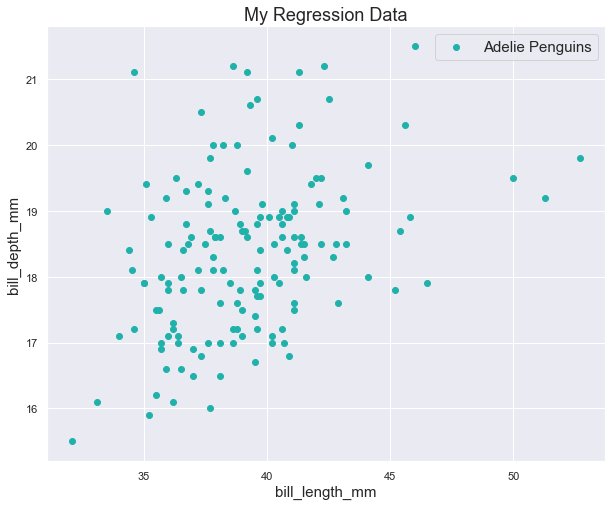

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

df = df.iloc[:152][["bill_length_mm", "bill_depth_mm"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.bill_length_mm, 
            df.bill_depth_mm, 
            color = "lightseagreen",
            label = "Adelie Penguins")
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

I believe that the plot identifies linear relationship, even though it looks scattered, but the scale is very zoomed in. But for comparison I would like to look at other features.


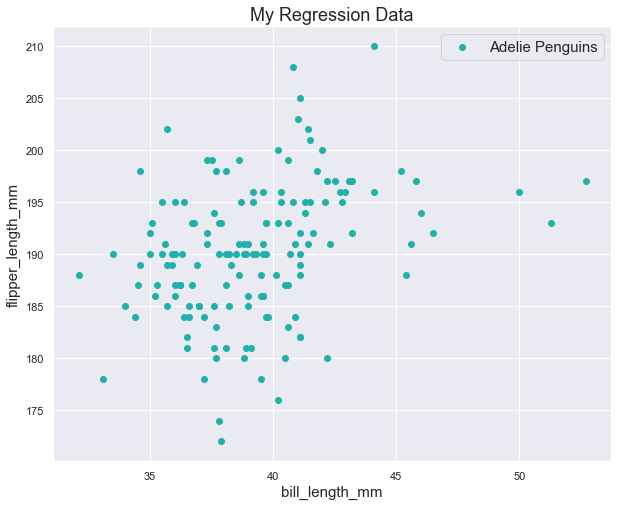

In [6]:
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)
df = df.iloc[:152][["bill_length_mm", "flipper_length_mm"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.bill_length_mm, 
            df.flipper_length_mm, 
            color = "lightseagreen",
            label = "Adelie Penguins")
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

These plot looks worse that the previous one. Let's look at one more pair of features.

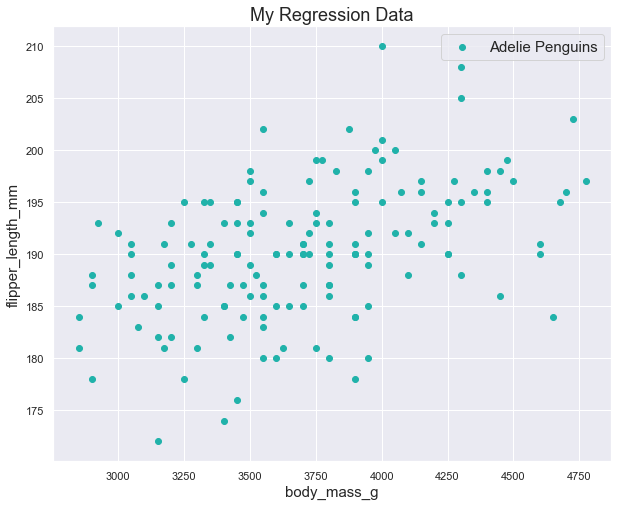

In [7]:
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

df = df.iloc[:152][["body_mass_g", "flipper_length_mm"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.body_mass_g, 
            df.flipper_length_mm, 
            color = "lightseagreen",
            label = "Adelie Penguins")
plt.xlabel("body_mass_g", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

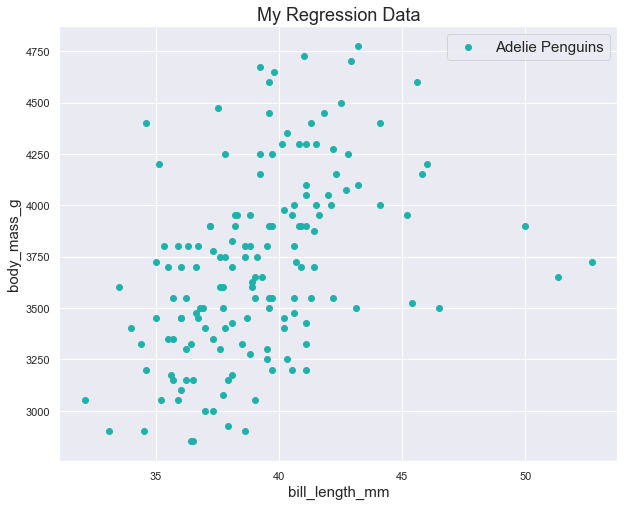

In [8]:
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)
df = df.iloc[:152][["bill_length_mm", "body_mass_g"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.bill_length_mm, 
            df.body_mass_g, 
            color = "lightseagreen",
            label = "Adelie Penguins")
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("body_mass_g", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

Visually comparing the plots I decided to try the regression model on the ```body_mass_g``` and ```flipper_length_mm```.

The ```Single neuron``` model provided in Lecture 4 is going to be used as a are function approximator. Moreover, the neuron's cost function is minimized through optimizing the weights and bias using Stochastic Gradient descent.

In [15]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


In [12]:
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

df = df.iloc[:152][["body_mass_g", "flipper_length_mm"]]

The data needs to be prepared prior to feeding into the Single Neuron. 

In [13]:
X = df.body_mass_g.values
X = X.reshape(-1, 1)
y = df.flipper_length_mm.values

In [16]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

<ipython-input-15-0c0ce0652919>:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
<ipython-input-15-0c0ce0652919>:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]


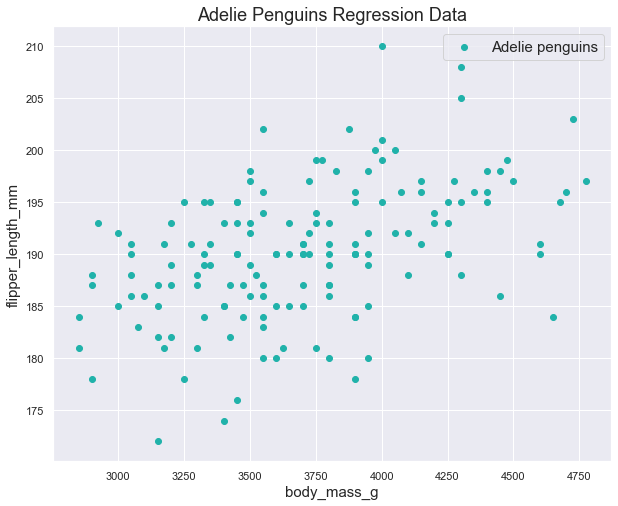

In [17]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adelie penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("body_mass_g", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.title("Adelie Penguins Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

No result on the features of body mass and the flipper length. So let's look at the other pairs.

In [24]:
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

df = df.iloc[:152][["bill_length_mm", "bill_depth_mm"]]
X = df.bill_length_mm.values
X = X.reshape(-1, 1)
y = df.bill_depth_mm.values

In [25]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

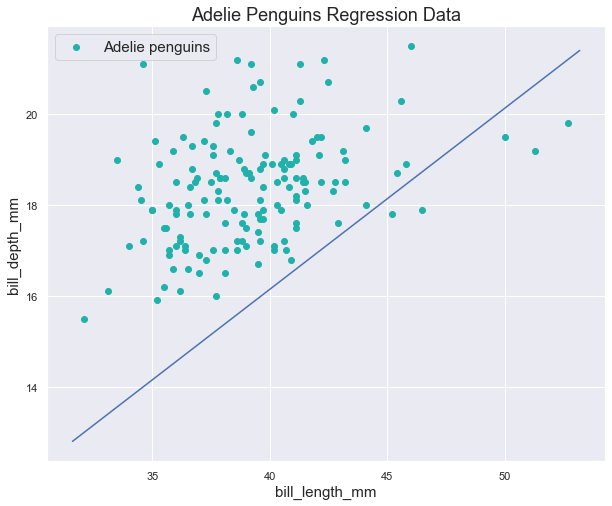

In [26]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adelie penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.title("Adelie Penguins Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

At least there is a line fitted into the data. However, it is not in the data itself. I want to look at one more pair.

In [27]:
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)
df = df.iloc[:152][["bill_length_mm", "body_mass_g"]]
X = df.bill_length_mm.values
X = X.reshape(-1, 1)
y = df.body_mass_g.values

In [40]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

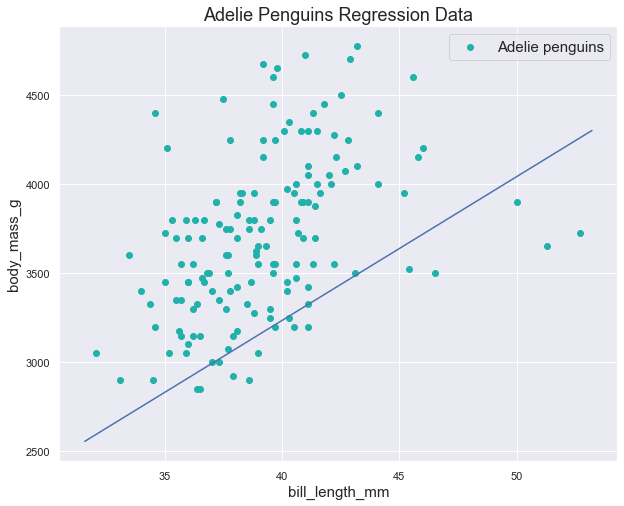

In [29]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adelie penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("body_mass_g", fontsize = 15)
plt.title("Adelie Penguins Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

What if I increase the number of epochs?

In [38]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 50)

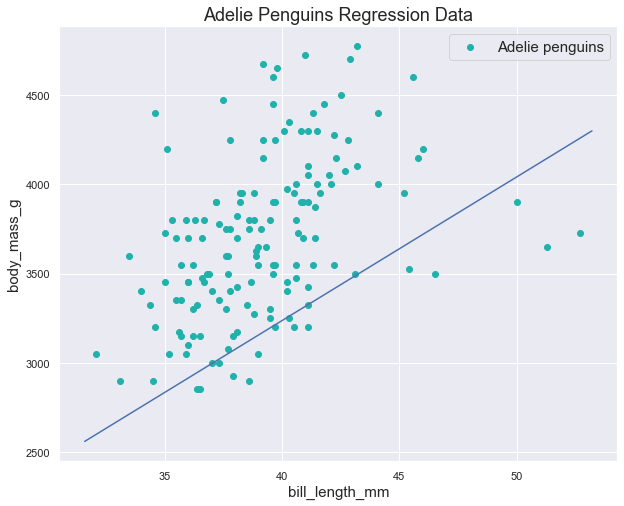

In [33]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adelie penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("body_mass_g", fontsize = 15)
plt.title("Adelie Penguins Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Changing the number of epochs did not change the result. The next parameter to change would be the learning rate. It is the "step size" of the gradiaent descent. Currently the alpha value is very small, which implies that the gradient is taking tiny steps, which does help in optimizing the weights and bias, but takes more computational time and space.

<ipython-input-15-0c0ce0652919>:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
<ipython-input-15-0c0ce0652919>:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
<ipython-input-15-0c0ce0652919>:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
<ipython-input-15-0c0ce0652919>:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]


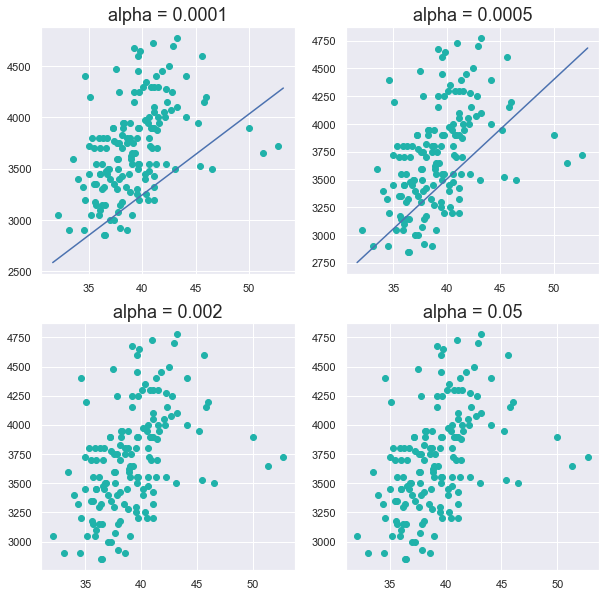

In [36]:
# Possible choices of learning rate 
alphas = [0.0001, 0.0005, 0.002, 0.05]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

Curiously, the alpha of 0.0005 performed better than alpha of 0.0001. But all values larger did not give any positive result.

It would be also beneficial to check the MSE.

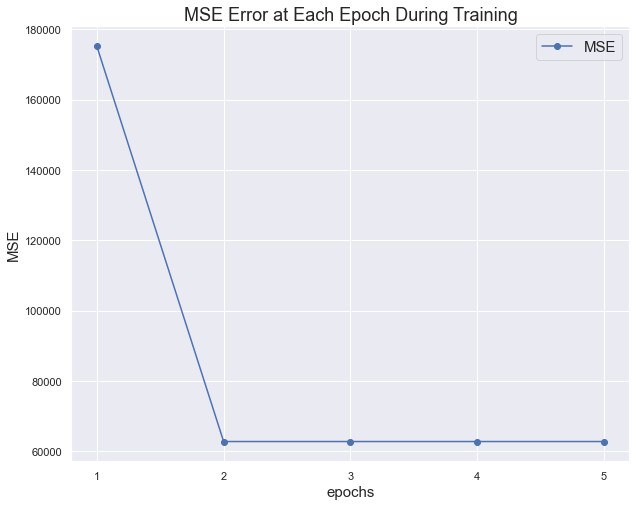

In [41]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

This graph explains that the change in the number of epochs did not affect the function, since the neuron learned in the first epoch. I think such behavior might be explained by a low variability of the data.

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

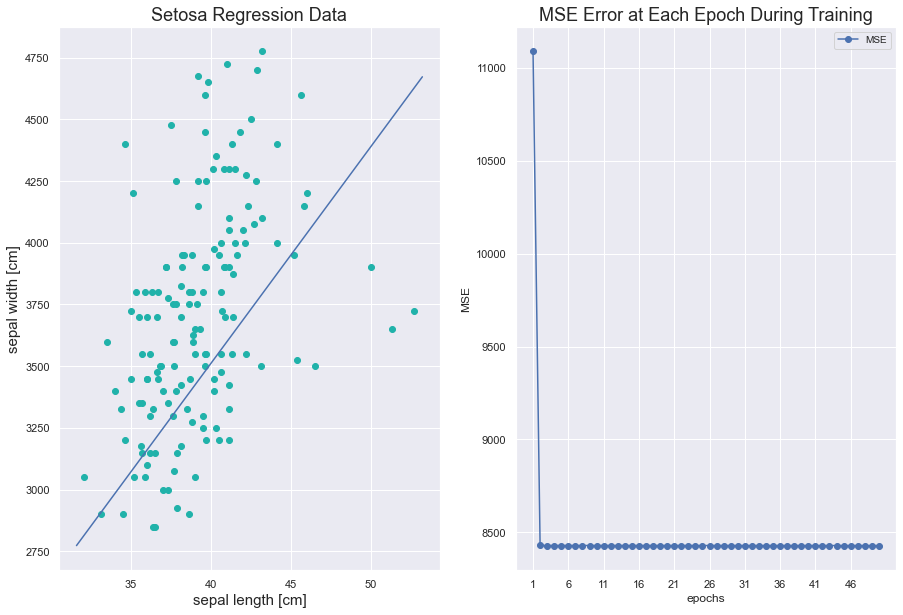

In [43]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0005, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("sepal length [cm]", fontsize = 15)
ax1.set_ylabel("sepal width [cm]", fontsize = 15)
ax1.set_title("Setosa Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

I would also run the Lineare Regression package from SciKit-Learn.

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.1886636528433545

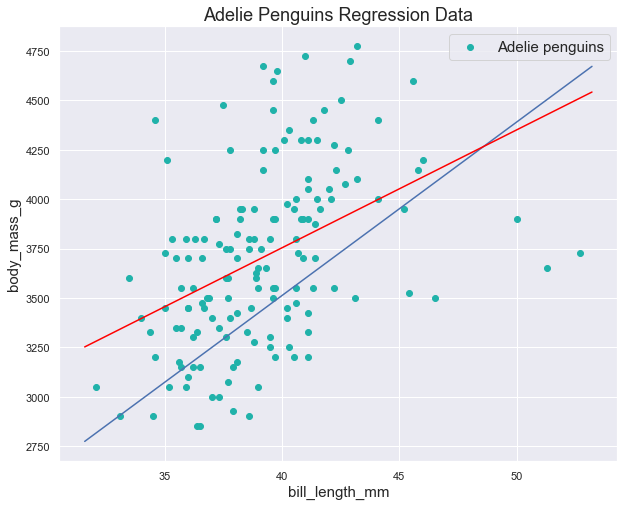

In [45]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adelie penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.plot(domain, reg.predict(domain.reshape(-1, 1)), color = "red")
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("body_mass_g", fontsize = 15)
plt.title("Adelie Penguins Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

The result from Scikit-learn is very similar to the Single neuron model that uses a linear activation function.